In [36]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import os 
import pandas as pd
import urllib
import bs4
import re
import copy
import collections as co
import plotly as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode

In [4]:
AS_N = pd.read_csv(r'C:\Users\User\Documents\GitHub\Projet_Python_2A\AS_N.csv')

In [5]:
#AS_N = pd.read_csv(r'C:\Users\Utilisateur\Documents\GitHub\Projet_Python_2A\AS_N.csv')

In [6]:
AS_N[['IMDB Rating']].isna().sum()

IMDB Rating    86
dtype: int64

In [7]:
AS_N.head()

,Unnamed: 0,Series Title,Year Released,Content Rating,IMDB Rating,R Rating,Genre,Description,No of Seasons,Streaming Platform,Top IMDB
0,0,Breaking Bad,2008,18+,9.5,100,"Crime,Drama","When Walter White, a New Mexico chemistry teac...",5,Netflix,1
1,1,Stranger Things,2016,16+,8.8,96,"Drama,Fantasy","When a young boy vanishes, a small town uncove...",3,Netflix,1
2,2,Dark,2017,16+,8.8,95,"Crime,Drama",A missing child causes four families to help e...,3,Netflix,1
3,3,Sherlock,2010,16+,9.1,94,"Action & Adventure,Crime",A modern update finds the famous sleuth and hi...,4,Netflix,1
4,4,Better Call Saul,2015,18+,8.7,92,"Comedy,Crime",Six years before Saul Goodman meets Walter Whi...,5,Netflix,1


In [8]:
AS_N.dtypes

Unnamed: 0              int64
Series Title           object
Year Released           int64
Content Rating         object
IMDB Rating           float64
R Rating                int64
Genre                  object
Description            object
No of Seasons           int64
Streaming Platform     object
Top IMDB                int64
dtype: object

In [9]:
AS_N[['No of Seasons']].isna().sum()
AS_N[['Top IMDB']].isna().sum()

Top IMDB    0
dtype: int64

In [11]:
# Matrice de corrélation
#argument conditionnel score, 0 par défaut, si = 1 on drop aussi les NaN de la colonne Score
def plotCorrelationMatrix(df, graphWidth,score=0):
    df = df.dropna(subset=['Year Released', 'IMDB Rating', 'R Rating']) # on enlève les séries où il y a une valeur manquante dans au moins une de ces colonnes
    if score ==1 : df = df.dropna(subset=['Score'])
    df = df[[col for col in df if df[col].nunique() > 1]] # on garde seulement les colonnes où il y a au moins une valeur
    
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    
    corr = sns.heatmap(df.corr(), annot = True)
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()


In [12]:
AS_N = AS_N.dropna(subset=['Year Released', 'IMDB Rating', 'R Rating'])
AS_N[['IMDB Rating']].isna().sum()

IMDB Rating    0
dtype: int64

ValueError: not enough values to unpack (expected 2, got 0)

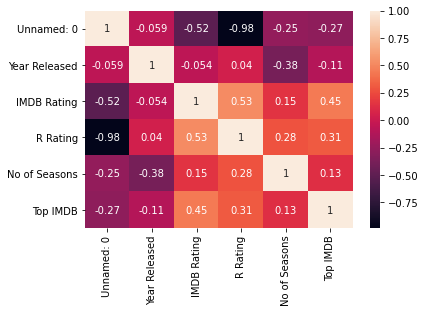

<Figure size 640x640 with 0 Axes>

In [14]:
plotCorrelationMatrix(AS_N, 8)
#Résultat étrange pour la corrélation entre la note imdb et la présence dans le top : 
#corrélation à 0.47 alors que la variable Top IMDB est codé à partir des résultats : 
#s'explique du fait que Top IMDB est une variable binaire avec un seuil à 8.4 ?

In [15]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize, score =0):
    
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(subset=['Year Released', 'IMDB Rating', 'R Rating']) # drop rows with NaN
    if score ==1 : df = df.dropna(subset=['Score'])
        
    df = df.loc[(df!=0).any(axis=1)]
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

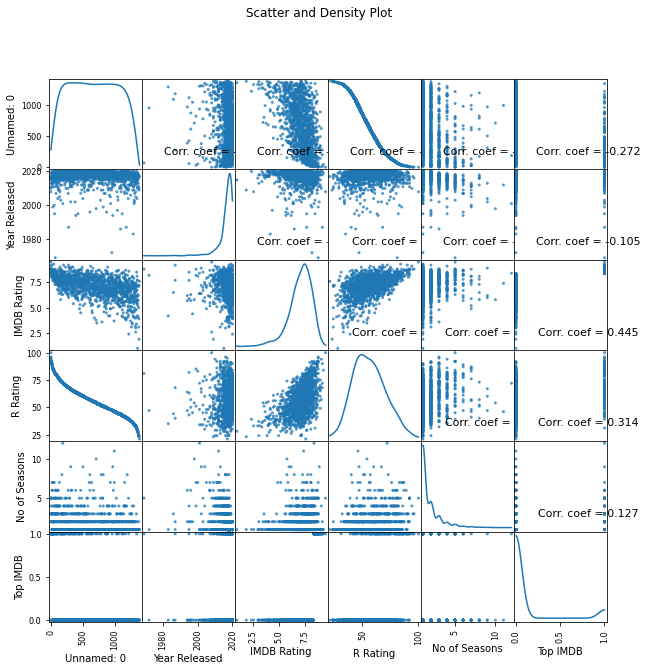

In [16]:
plotScatterMatrix (AS_N,10,11)

In [17]:
AS_N_x_carac = pd.read_csv(r'C:\Users\User\Documents\GitHub\Projet_Python_2A\AS_N_x_carac.csv')

In [18]:
#AS_N_x_carac = pd.read_csv(r'C:\Users\Utilisateur\Documents\GitHub\Projet_Python_2A\AS_N_x_carac.csv')

In [19]:
AS_N_x_carac.tail()

,Unnamed: 0,Year Released,Content Rating,IMDB Rating,R Rating,Genre,Description,No of Seasons,Top IMDB,Netflix Exclusive,Score
1422,Zumbo's Just Desserts,2016,7+,6.9,60,"Reality,2016",Australia’s very own Willy Wonka Adriano Zumbo...,2,0,NaN,NaN
1423,iZombie,2015,16+,7.9,82,"Drama,Science-Fiction",A medical student who becomes a zombie joins a...,5,0,NaN,NaN
1424,revisions,2019,18+,6.1,48,"Animation,Action & Adventure",An isolated city. An unknown enemy. An uncerta...,1,0,NaN,NaN
1425,天国的嫁衣,2004,NaN,5.6,30,"Drama,2004",It was with much difficulty that Ai-Ching (Cyn...,1,0,NaN,NaN
1426,阳关道,2018,NaN,3.2,33,"Comedy,Horror","To catch three criminal masterminds, a group o...",1,0,NaN,NaN


ValueError: not enough values to unpack (expected 2, got 0)

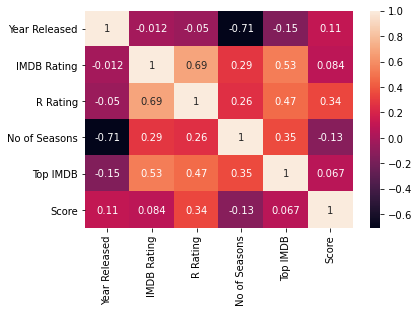

<Figure size 640x640 with 0 Axes>

In [20]:
plotCorrelationMatrix(AS_N_x_carac, 8, 1)
#comme il y a peu de séries qui ont un score, les corrélations sont calculées sur un échantillon plus faible
#d'où des changements dans les valeurs

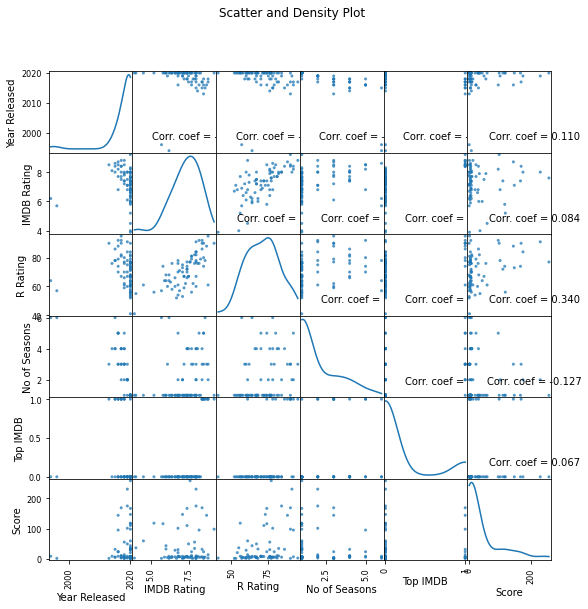

In [21]:
plotScatterMatrix (AS_N_x_carac,9,10,1)

# Représentation des profils de série

In [22]:
AS = pd.read_csv(r'C:\Users\User\Documents\GitHub\Projet_Python_2A\AS.csv')
df_carac= pd.read_csv(r'C:\Users\User\Documents\GitHub\Projet_Python_2A\df_carac.csv')

In [23]:
#AS = pd.read_csv(r'C:\Users\Utilisateur\Documents\GitHub\Projet_Python_2A\AS.csv')
#df_carac= pd.read_csv(r'C:\Users\Utilisateur\Documents\GitHub\Projet_Python_2A\df_carac.csv')

In [24]:
AS_x_carac = AS.set_index('Series Title').join(df_carac.set_index('Unnamed: 0'))

In [25]:
AS_Top = AS_x_carac[AS_x_carac["Top IMDB"] == 1]
AS_N_Top = AS_N_x_carac[AS_N_x_carac["Top IMDB"] == 1]

AS_N_score = AS_N_x_carac.dropna(subset=['Score'])

        
N_Originals = AS_N_x_carac[AS_N_x_carac["Netflix Exclusive"] == 'Yes']
N_Originals_Top = N_Originals[N_Originals["Top IMDB"] == 1]

In [31]:
AS_N_x_carac[AS_N_x_carac['Unnamed: 0'].isin(['The Last Dance'])]

,Unnamed: 0,Year Released,Content Rating,IMDB Rating,R Rating,Genre,Description,No of Seasons,Top IMDB,Netflix Exclusive,Score
1175,The Last Dance,2020,16+,9.2,90,"Documentary,Biography",A 10-part documentary chronicling the untold s...,1,1,No,98.0


In [32]:
AS_x_carac.head()

,Unnamed: 0,Year Released,Content Rating,IMDB Rating,R Rating,Genre,Description,No of Seasons,Streaming Platform,Top IMDB,Type,Netflix Exclusive,Score
Mysteries of the Outdoors,12027,2017,NaN,NaN,-1,"2017,Travel Channel",Mysteries of the Outdoors has one or more epis...,2,Travel Channel,0,NaN,NaN,NaN
#BlackLove,8319,2015,16+,6.1,37,"Reality,Drama",#BlackLove follows five dynamic black women fr...,2,"Free Services,FYI",0,NaN,NaN,NaN
"#MeToo, Now What?",10046,2018,NaN,6.8,27,"Documentary,2018",Executive editor and host Zainab Salbi goes be...,1,"Free Services,Prime Video,Hoopla",0,NaN,NaN,NaN
#RichKids of Beverly Hills,8233,2014,16+,3.1,38,"Reality,2014",A look into the privileged lives of several tw...,4,fuboTV,0,NaN,NaN,NaN
#ThatsHarassment,10699,2018,NaN,NaN,18,"2018,Prime Video",#ThatsHarassment is a series of 6 short films ...,1,"Prime Video,Hulu,Starz",0,NaN,NaN,NaN


In [66]:
def BoxplotEchantillon(Var,Title, graphWidth,score=0):

    fig = go.Figure()

    fig.add_trace(go.Box(
        y = AS_Top[Var],
        name='Top IMDB',
        marker_color='#DBA506'
    ))

    fig.add_trace(go.Box(
        y = AS_N_Top[Var],
        name='Top IMDB Netflix',
        marker_color='#086A87'
    ))

    fig.add_trace(go.Box(
        y = AS_N_score[Var],
        name='Top Netflix',
        marker_color='#AB63FA'
    ))

    fig.add_trace(go.Box(
        y = N_Originals[Var],
        name='Contenu Original',
        marker_color='#DF0101'
    ))

    fig.add_trace(go.Box(
        y = N_Originals_Top[Var],
        name='Top IMDB Contenu Original',
        marker_color='#FF97FF'
    ))

    fig.update_layout(
        template = 'presentation',
        title = Title + " en fontion de l'échantillon",
        yaxis_title='Notes',
        boxmode='group' # group together boxes of the different traces for each value of x
    )

    fig.update_layout(legend=dict(
        yanchor="bottom",
        y=1.2,
        xanchor="right",
        x=0.01))
    
    fig.show()

In [67]:
BoxplotEchantillon('IMDB Rating','Notes IMDB',9,10)

In [68]:
BoxplotEchantillon('R Rating','Notes Rotten Tomatoes',9,10)

In [69]:
BoxplotEchantillon('Year Released','Année de sortie',9,10)

In [70]:
BoxplotEchantillon('No of Seasons','Nombre de saisons',9,10)

In [75]:
BoxplotEchantillon('Score','Score Netflix',9,10)

In [76]:
#Meme code que dans exploration de AS

def recup_cat(data):
    
    col = "Genre"
    categories = ", ".join(data['Genre']).split(", ")
    #print (categories)
    categories = ",".join(data['Genre']).split(",")
    #print (categories)
    
    """on enlève les catégories inutiles"""
    for i in ['2018','2017','2016','2019','2020','Netflix','2015','2012','2007','2004',
              '2010','2013','2009','1969','2005','2006','2014','1999','1972','2002','2011',
              '2008','Hulu','Prime Video','fuboTV']:
        while i in categories:
            categories.remove(i)
    return(categories)

In [77]:
#Meme code que dans exploration de AS

def count_genra (data_f,nombre=7):
    
    categories=recup_cat(data_f)

    #print(categories)

    """On compte le nombre d'occurences de chaque type et on garde les 50 qui apparaissent le plus souvent"""
    counter_list = co.Counter(categories).most_common(nombre)
    #print ((counter_list))

    """On conserve le premier élément de chaque couple de counter_list (ie. sur le genre) et on inverse l'ordre de la liste"""
    labels = [_[0] for _ in counter_list][::-1]
    #print (labels)

    """Idem pour le nombre d'occurrences"""
    values = [_[1] for _ in counter_list][::-1]
    return (values,labels)

In [78]:
count_genra(AS_Top,9)

([38, 42, 72, 75, 81, 111, 149, 224, 247],
 ['Family',
  'Anime',
  'Animation',
  'Reality',
  'Crime',
  'Action & Adventure',
  'Comedy',
  'Drama',
  'Documentary'])

In [79]:
"""----------Fonction qui compare les genres les plus populaires en fonction des plateformes----------"""
def comp_echantillon_genra(nombre):
    genre_count={}
    genre_count["Top IMDB"]=count_genra(AS_Top,nombre)
    genre_count["Top IMDB Netflix"]=count_genra(AS_N_Top,nombre)
    genre_count["Top Netflix"]=count_genra(AS_N_score,nombre)
    genre_count["Contenu Original"]=count_genra(N_Originals,nombre)
    genre_count["Top Imdb Contenu Original"]=count_genra(N_Originals_Top,nombre)
    print(genre_count)
    colors =['#DBA506','#086A87','#AB63FA','#DF0101','#FF97FF']

    fig = plt.subplots.make_subplots(rows = 3, cols = 2, subplot_titles = ['Top IMDB','Top IMDB Netflix','Top Netflix','Contenu Original','Top Imdb Contenu Original'],
                                    horizontal_spacing=0.15,
                                    vertical_spacing=0.2)
    for e,i in enumerate(['Top IMDB','Top IMDB Netflix','Top Netflix','Contenu Original','Top Imdb Contenu Original']):
        trace = go.Bar(y = genre_count[i][1], x=genre_count[i][0],
                       marker_color=colors[e],name ="titres" , orientation = 'h')
        fig.add_trace(trace, row = (e//2) + 1, col = (e%2) + 1)

    fig.update_layout(showlegend = False)
    fig.update_layout(template = 'presentation',margin=dict(l=180, r=80, t=70, b=50),
                      title = { 'text' : '<b>Contenu le plus populaire selon les échantillons</b>', 'x' : 0.5},
                     font_family = 'Calibri', font_size = 16, title_font_color= 'black', showlegend = False)
    fig.show()
    return


In [80]:
comp_echantillon_genra(5)

{'Top IMDB': ([81, 111, 149, 224, 247], ['Crime', 'Action & Adventure', 'Comedy', 'Drama', 'Documentary']), 'Top IMDB Netflix': ([20, 21, 22, 27, 61], ['Documentary', 'Comedy', 'Action & Adventure', 'Crime', 'Drama']), 'Top Netflix': ([11, 14, 17, 20, 23], ['Reality', 'Crime', 'Drama', 'Documentary', 'Comedy']), 'Contenu Original': ([11, 12, 15, 19, 20], ['Reality', 'Crime', 'Drama', 'Documentary', 'Comedy']), 'Top Imdb Contenu Original': ([2, 2, 2, 2, 3], ['History', 'Action & Adventure', 'Crime', 'Documentary', 'Drama'])}
